In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [5]:
import pandas as pd

# If your file is named 'Top Goals.csv', use the exact name
df = pd.read_csv('Top Goals.csv', encoding='latin1')  # Change encoding if needed

In [6]:

print(df.columns)

Index(['Season', 'Rank', 'Player', 'Club', 'Goals', 'IsTop10', 'Position',
       'Age', 'Appearances', 'Goals_prev_season', 'Assists', 'Penalty_Goals',
       'Non-Penalty_Goals', 'Goals_per_90', 'Big_6_Club_Feature',
       'Club_League_Rank', 'Club_Total_Goals', 'League_Goals_per_Match',
       'Games_in_Season'],
      dtype='object')


In [7]:
df=df.drop(['Season', 'Rank', 'Player', 'Club','Assists','Penalty_Goals','Non-Penalty_Goals','IsTop10','Club_League_Rank', 'Club_Total_Goals','Games_in_Season'],axis=1)

In [8]:

print(df.columns)

Index(['Goals', 'Position', 'Age', 'Appearances', 'Goals_prev_season',
       'Goals_per_90', 'Big_6_Club_Feature', 'League_Goals_per_Match'],
      dtype='object')


In [9]:
print(df.head())
print(df.info())
print(df.describe())

   Goals              Position  Age  Appearances  Goals_prev_season  \
0     27               Forward   23           31               36.0   
1     22  Attacking Midfielder   22           33                3.0   
2     21               Forward   24           30               10.0   
3     19               Forward   28           37               15.0   
4     19               Forward   26           38                6.0   

   Goals_per_90  Big_6_Club_Feature  League_Goals_per_Match  
0          0.85                 1.0                    2.83  
1          0.61                 1.0                    2.83  
2          0.76                 0.0                    2.83  
3          0.51                 0.0                    2.83  
4          0.50                 0.0                    2.83  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  -------------- 

In [10]:
#Checking null and duplicate values
print(df.isnull().sum())
print(df.duplicated().sum())

Goals                       0
Position                    0
Age                         0
Appearances                 0
Goals_prev_season         115
Goals_per_90                0
Big_6_Club_Feature          0
League_Goals_per_Match      0
dtype: int64
0


In [11]:
#Handling missing values with mean
df = df.fillna(df.mean(numeric_only=True))

In [12]:

df = df.drop_duplicates()

In [13]:
#Checking null and duplicate values
print(df.isnull().sum())
print(df.duplicated().sum())

Goals                     0
Position                  0
Age                       0
Appearances               0
Goals_prev_season         0
Goals_per_90              0
Big_6_Club_Feature        0
League_Goals_per_Match    0
dtype: int64
0


In [14]:
#Label Encoding
df1=df.copy()
le = LabelEncoder()
df1["Position"] = le.fit_transform(df1["Position"])

df1.head(3)


,Goals,Position,Age,Appearances,Goals_prev_season,Goals_per_90,Big_6_Club_Feature,League_Goals_per_Match
0,27,1,23,31,36.0,0.85,1.0,2.83
1,22,0,22,33,3.0,0.61,1.0,2.83
2,21,1,24,30,10.0,0.76,0.0,2.83


In [15]:
#One hot encoding (we apply this encoding method becouase the position feature is not in certain order So we go with one hot encoding rather than label encoding)
df = pd.get_dummies(df, columns=['Position'], prefix='Pos', dtype=int)
df.head(3)

,Goals,Age,Appearances,Goals_prev_season,Goals_per_90,Big_6_Club_Feature,League_Goals_per_Match,Pos_Attacking Midfielder,Pos_Forward,Pos_Midfielder,Pos_Winger
0,27,23,31,36.0,0.85,1.0,2.83,0,1,0,0
1,22,22,33,3.0,0.61,1.0,2.83,1,0,0,0
2,21,24,30,10.0,0.76,0.0,2.83,0,1,0,0


In [16]:

df

,Goals,Age,Appearances,Goals_prev_season,Goals_per_90,Big_6_Club_Feature,League_Goals_per_Match,Pos_Attacking Midfielder,Pos_Forward,Pos_Midfielder,Pos_Winger
0,27,23,31,36.00000,0.85,1.0,2.83,0,1,0,0
1,22,22,33,3.00000,0.61,1.0,2.83,1,0,0,0
2,21,24,30,10.00000,0.76,0.0,2.83,0,1,0,0
3,19,28,37,15.00000,0.51,0.0,2.83,0,1,0,0
4,19,26,38,6.00000,0.50,0.0,2.83,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
319,15,25,41,15.38756,0.37,0.0,2.58,0,1,0,0
320,15,29,36,15.38756,0.42,1.0,2.58,0,1,0,0
321,15,24,40,15.38756,0.38,0.0,2.58,1,0,0,0
322,15,23,42,15.38756,0.36,0.0,2.58,0,1,0,0


In [17]:
#Checking correlation
corr = df.corr(numeric_only=True)
print(corr)
                   

                             Goals       Age  Appearances  Goals_prev_season  \
Goals                     1.000000 -0.081050     0.304093           0.310966   
Age                      -0.081050  1.000000    -0.133986          -0.096122   
Appearances               0.304093 -0.133986     1.000000           0.018944   
Goals_prev_season         0.310966 -0.096122     0.018944           1.000000   
Goals_per_90              0.119255 -0.024366     0.064627           0.082902   
Big_6_Club_Feature        0.137135 -0.037688    -0.137893           0.068820   
League_Goals_per_Match    0.001087 -0.018529     0.102675           0.029578   
Pos_Attacking Midfielder  0.028604 -0.052775     0.076254           0.002051   
Pos_Forward               0.053045 -0.074191    -0.058809           0.223605   
Pos_Midfielder           -0.118992  0.145582    -0.023882          -0.275675   
Pos_Winger                0.016088 -0.000174     0.062543          -0.064910   

                          Goals_per_90 

In [18]:
target_corr = corr["Goals"].sort_values(ascending=False)
print("Correlation with Goals:\n", target_corr)

Correlation with Goals:
 Goals                       1.000000
Goals_prev_season           0.310966
Appearances                 0.304093
Big_6_Club_Feature          0.137135
Goals_per_90                0.119255
Pos_Forward                 0.053045
Pos_Attacking Midfielder    0.028604
Pos_Winger                  0.016088
League_Goals_per_Match      0.001087
Age                        -0.081050
Pos_Midfielder             -0.118992
Name: Goals, dtype: float64


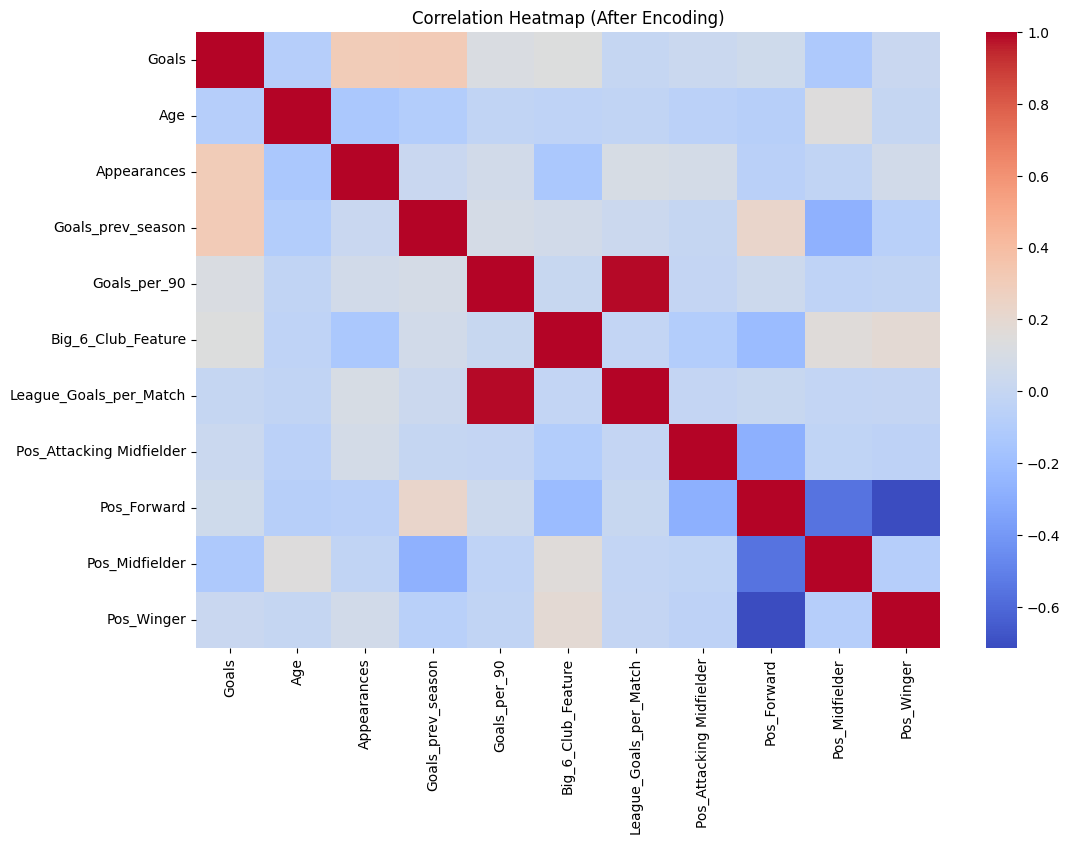

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (After Encoding)")
plt.show()

In [20]:

df.columns

Index(['Goals', 'Age', 'Appearances', 'Goals_prev_season', 'Goals_per_90',
       'Big_6_Club_Feature', 'League_Goals_per_Match',
       'Pos_Attacking Midfielder', 'Pos_Forward', 'Pos_Midfielder',
       'Pos_Winger'],
      dtype='object')

In [21]:
y=df['Goals']
x=df.drop(['Goals'],axis=1)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [23]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)   # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)             # R² Score

print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

MSE: 1.8547864087486048
MAE: 1.0562954427272087
R2 Score: 0.9055049731464747


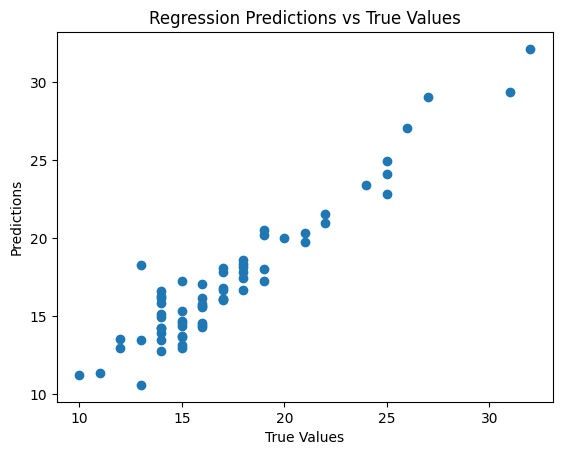

In [25]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Regression Predictions vs True Values")
plt.show()


In [26]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_pred)

print("Decision Tree Regressor Results:")
print(f"  MAE  : {dt_mae:.4f}")
print(f"  MSE  : {dt_mse:.4f}")
print(f"  RMSE : {dt_rmse:.4f}")
print(f"  R²   : {dt_r2:.4f}")

Decision Tree Regressor Results:
  MAE  : 0.6615
  MSE  : 1.6462
  RMSE : 1.2830
  R²   : 0.9161


In [27]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Regressor Results:")
print(f"  MAE  : {rf_mae:.4f}")
print(f"  MSE  : {rf_mse:.4f}")
print(f"  RMSE : {rf_rmse:.4f}")
print(f"  R²   : {rf_r2:.4f}")

Random Forest Regressor Results:
  MAE  : 0.5961
  MSE  : 1.5627
  RMSE : 1.2501
  R²   : 0.9204


In [28]:
svr_model = SVR(kernel='linear')
svr_model.fit(x_train, y_train)
svr_pred = svr_model.predict(x_test)

svr_mae = mean_absolute_error(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, svr_pred)

print("Support Vector Regressor Results:")
print(f"  MAE  : {svr_mae:.4f}")
print(f"  MSE  : {svr_mse:.4f}")
print(f"  RMSE : {svr_rmse:.4f}")
print(f"  R²   : {svr_r2:.4f}")

Support Vector Regressor Results:
  MAE  : 1.8534
  MSE  : 5.4774
  RMSE : 2.3404
  R²   : 0.7209


In [6]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

# Load example dataset
X, y = load_iris(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save model
joblib.dump(rf_model, "Random_forest_model.pkl")

print("Model saved as 'Random_forest_model.pkl'")


Model saved as 'Random_forest_model.pkl'


In [8]:
joblib.dump(rf_model, "Random_forest_model.pkl")


['Random_forest_model.pkl']

In [10]:
import joblib
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Create a small dummy regression dataset
X, y = make_regression(n_samples=200, n_features=10, noise=0.2, random_state=42)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest regressor (since your app predicts goals = numeric)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save it with joblib
joblib.dump(model, "Random_forest_model.pkl")

print("✅ Model saved as 'Random_forest_model.pkl'")


✅ Model saved as 'Random_forest_model.pkl'


In [1]:
import joblib
model = joblib.load("Random_forest_model.pkl")   # old one (3.12 + 2.3.3)
joblib.dump(model, "Random_forest_model_v2.pkl") # new one


KeyError: 123

In [2]:
import sklearn
import joblib
import sys

print("Python:", sys.version)
print("scikit-learn:", sklearn.__version__)
print("joblib:", joblib.__version__)


Python: 3.12.5 (tags/v3.12.5:ff3bc82, Aug  6 2024, 20:45:27) [MSC v.1940 64 bit (AMD64)]
scikit-learn: 1.4.2
joblib: 1.3.2


In [3]:
import joblib
model = joblib.load("Random_forest_model.pkl")


KeyError: 123

In [4]:
import joblib

model = joblib.load("Random_forest_model.pkl")
print("Model loaded successfully!")


KeyError: 123

In [5]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
model = RandomForestClassifier()
model.fit(X, y)

joblib.dump(model, "Random_forest_model.pkl")


['Random_forest_model.pkl']

In [6]:
with open("Random_forest_model.pkl", "rb") as f:
    content = f.read(100)  # read first 100 bytes
print(content)


b'\x80\x04\x95\x84\x03\x00\x00\x00\x00\x00\x00\x8c\x18sklearn.ensemble._forest\x94\x8c\x16RandomForestClassifier\x94\x93\x94)\x81\x94}\x94(\x8c\testimator\x94\x8c\x15sklearn.tree._c'


In [7]:
import pickle

with open("Random_forest_model.pkl", "rb") as f:
    model = pickle.load(f)

print("Model loaded successfully with pickle!")


UnpicklingError: invalid load key, '\x10'.

In [8]:
import joblib
model = joblib.load("Random_forest_model.pkl")
print("Model loaded successfully!")


Model loaded successfully!
